# **Rice Type Classification**

----------------------
## **Context**
----------------------

Rice forms the staple ingredient for meals across multiple countries all over the world. Rice provides 21% of global human per capita energy and 15% of per capita protein. For several Asian nations, rice is also very important from a business perspective. India had the highest export volume of rice worldwide, at 18.75 million metric tons as of 2021/2022.  It exports non-Basmati rice to African countries and Basmati to the Middle East. Vietnam was the second-largest rice exporter, with about 6.5 million metric tons of rice worldwide in that year.

Deep learning algorithms have recently seen numerous applications in the field of agriculture, specifically in crop identification. Convolutional Neural Networks (CNN) can be utilized to identify the different rice types, as classifying rice into its true type becomes a very necessary step in agricultural export businesses globally.

---------------------
## **Objective**
---------------------
The project aims to build a Neural Network to differentiate among 5 different rice types, namely Arborio, Basmati, Ipsala, Jasmine, and Karacadag.

----------------------
## **Dataset**
----------------------
The dataset is a folder consisting of close to 75000 images split into 3 folders namely, train, validation, and test. Each of these three folders has 5 sub-folders that are named after the 5 types of rice we are going to be studying here, i.e., Arborio, Basmati, Ipsala, Jasmine, and Karacadag.

## **Importing Required Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
from PIL import Image

# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, LeakyReLU, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

We will be using **Google Colab** to run this notebook. Please don't run the notebook on Jupyter in order to avoid errors due to uninstalled libraries. For a better understanding on how Google Colab works, please refer to the 'Getting Started with Google Colab' module under the 'Getting Started with Deep Learning' section in the Deep Learning week.

First, let's **import the data** so that Colab can access the dataset. One way to load the data in Colab is by uploading the dataset from your Google drive. Please make sure that you have downloaded the dataset file from your Olympus in zipped format and that you have uploaded it to your Google Drive in the same format. Once you run the cell, it will ask you permission to link your drive.

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/Colab Notebooks/LVC 6.2 CNN/data'

Rice_Image_Dataset.zip


In [4]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/LVC 6.2 CNN/data/Rice_Image_Dataset.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
picture_size = 48
folder_path = "Rice_Image_Dataset/"

## **Visualizing the Rice Types**

Let's visualize each kind of rice separately and observe their physical appearances.

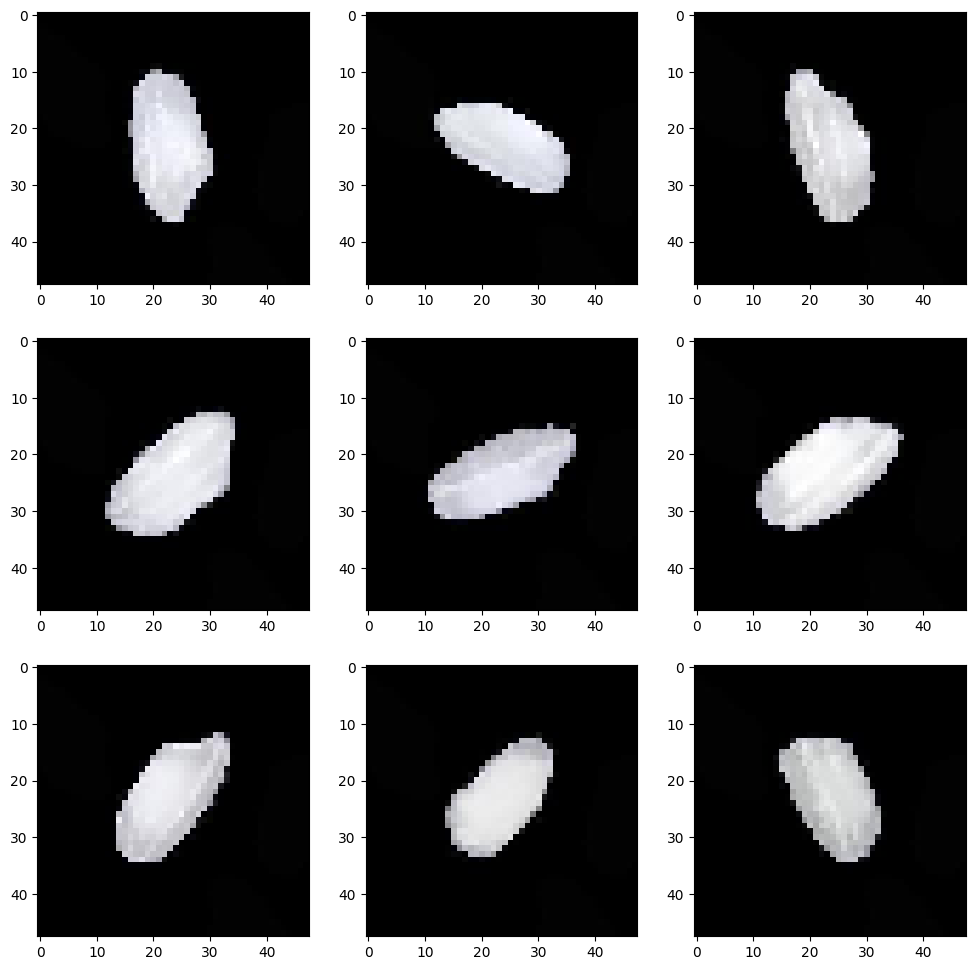

In [7]:
# Visualizing Arborio rice type
rice_type = 'Arborio'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + rice_type + "/" +
                  os.listdir(folder_path + "train/" + rice_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

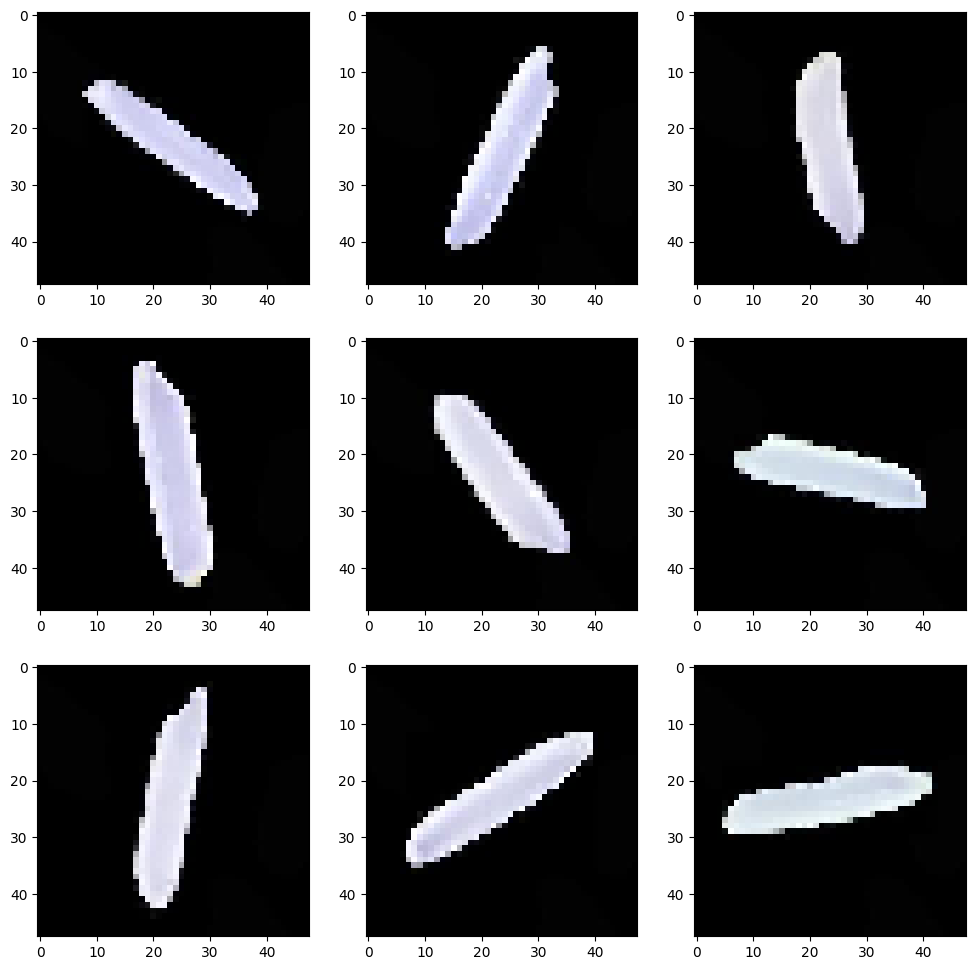

In [8]:
# Visualizing Basmati rice type
rice_type = 'Basmati'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + rice_type + "/" +
                  os.listdir(folder_path + "train/" + rice_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

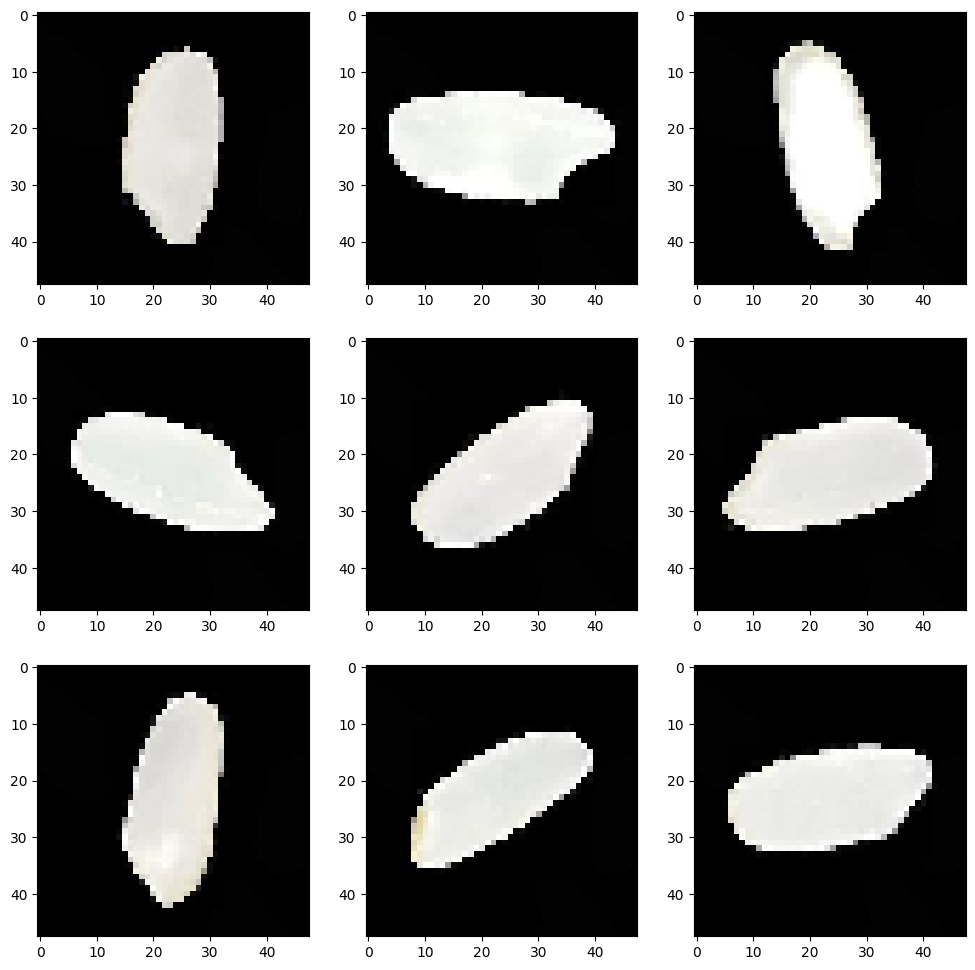

In [9]:
# Visualizing Ipsala rice type
rice_type = 'Ipsala'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path + "train/" + rice_type + "/" +
                  os.listdir(folder_path + "train/" + rice_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

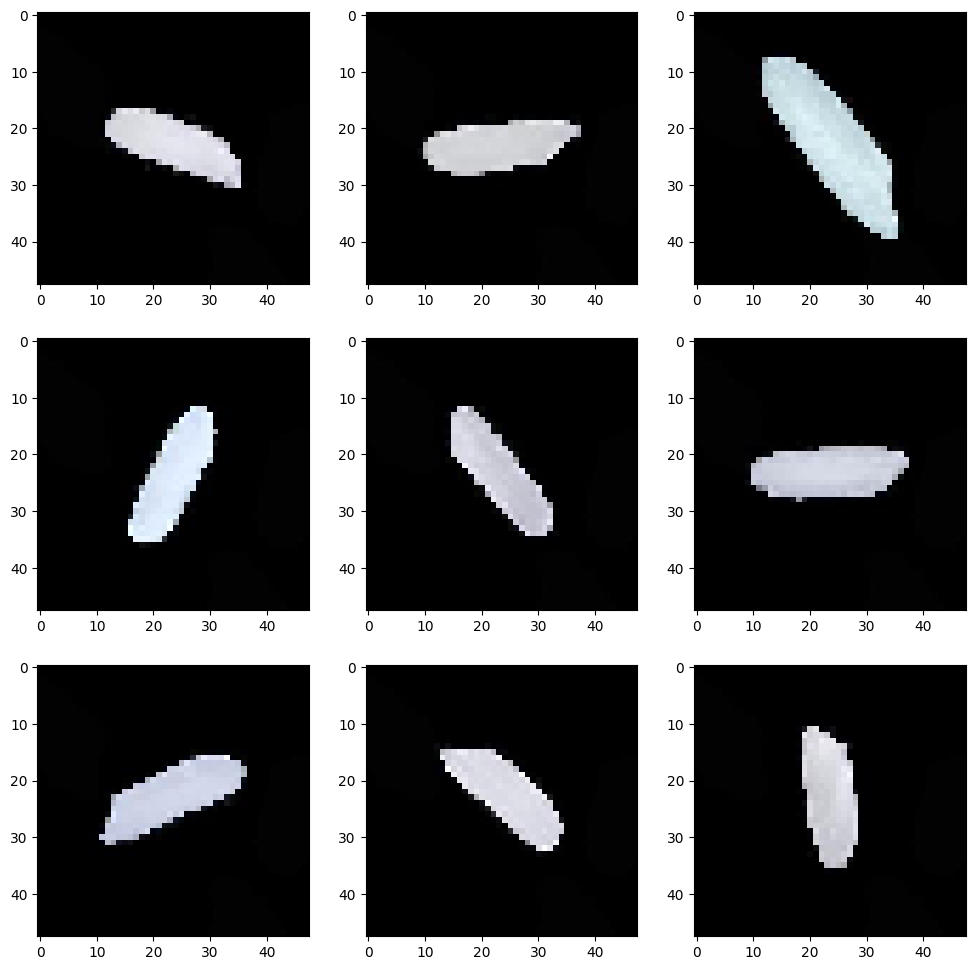

In [10]:
# Visualizing Jasmine rice type
rice_type = 'Jasmine'

plt.figure(figsize= (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + rice_type + "/" +
                  os.listdir(folder_path + "train/" + rice_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

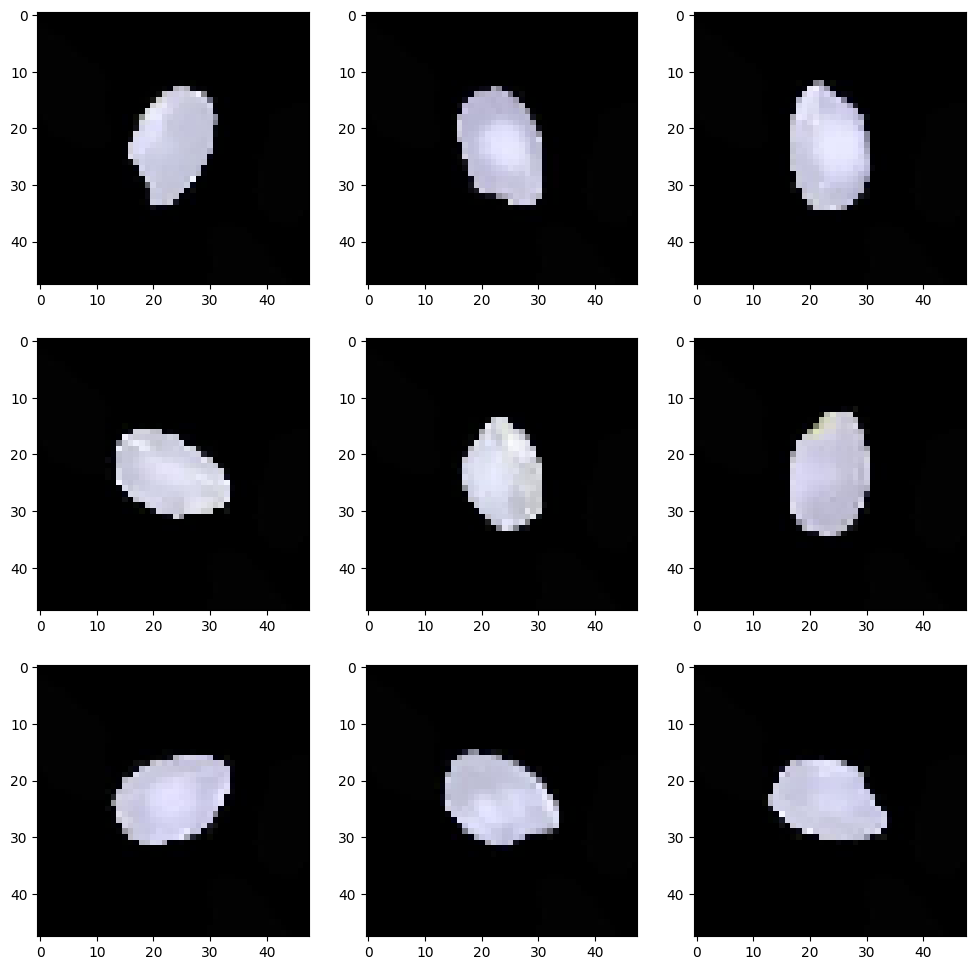

In [11]:
# Visualizing Karacadag rice type
rice_type = 'Karacadag'

plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + rice_type + "/" +
                  os.listdir(folder_path + "train/" + rice_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations:**

1) We have magnified images of rice on black background. The images are fairly simple and there are no features or curves other than the shape of the grain.

2) Since these images are already present in various orientations, we don't need to try data augmentation on these images before training.

3) On visual inspection, we can see that Basmati rice has the longest grains, followed by Jasmine.

4) Karacadag has almost rounded grains.

5) Jasmine rice has an evenly distributed structure, i.e, they are not too long nor too short and their ends are somewhat sharp.

6) Ipsala has a cleft end.

## **Creating Train and Test Image Data Generators**

Let's create data loaders to pass to the neural network architectures. We will let the train, validation, and test data loaders take the images from their respective folders.

In [12]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'],
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'],
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'],
                                              shuffle = True)

Found 73920 images belonging to 5 classes.
Found 540 images belonging to 5 classes.
Found 540 images belonging to 5 classes.


Let's train the model next. As we observe above that the dataset is huge. It consists of about 74K images distributed into 5 classes. So we don't need to run our data set over a large number of epochs. We are choosing just 2 epochs to avoid high computational time. However, interested learners can play around with that parameter to see if you're getting better results.

## **Model Building**

### **Creating our Base ANN Model**

Let's create an ANN model sequentially, where we will be adding the layers one after another. Unlike Convolutional Neural Networks, Artificial Neural Networks cannot have images as inputs. We need to pass tabular data to Artificial Neural Networks. Therefore we need to Flatten the images to convert it into 1-D arrays before we feed it to the Fully Connected Layers. Therefore, our first layer in the ANN while working with image data should be a 'Flatten' layer.

In [13]:
annmodel_1 = Sequential([

    # Adding Flatten layer
    Flatten(input_shape = (48, 48, 1)),

    # Dense or Fully Connected Layers
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),

    # Classifier
    Dense(5, activation = 'softmax')
])

# Compiling the model
annmodel_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

# Printing out the model summary
annmodel_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1180160   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 1,312,773
Trainable params: 1,312,773
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = annmodel_1.fit(train_set, validation_data = validation_set, epochs = 2)

Epoch 1/2
578/578 [==============================] - 117s 200ms/step - loss: 3.2814 - accuracy: 0.9207 - val_loss: 0.2562 - val_accuracy: 0.9574
Epoch 2/2
578/578 [==============================] - 115s 198ms/step - loss: 0.2722 - accuracy: 0.9548 - val_loss: 0.1601 - val_accuracy: 0.9741


#### **Let's evaluate on test data**

In [15]:
test_images, test_labels = next(test_set)
accuracy = annmodel_1.evaluate(test_images, test_labels, verbose = 2)

4/4 - 0s - loss: 0.0920 - accuracy: 0.9766 - 54ms/epoch - 14ms/step


**Observations:**

- The ANN or fully connected model has given an accuracy of about 95% on the training data and about 87% on the test data. The reason an ANN model is performing so well over image data might be all the images have the subject, i.e, the rice grain, exactly in their center. So, the local spatiality is not becoming a huge issue here.
- Moreover, the images are not too complex and they have these grains over a black background, just as in the MNIST datasets. Hence, an ANN actually performs well in this case.

### **Creating our Base CNN Model**

In [16]:
model1 = Sequential()

# First Convolutional Block
model1.add(Conv2D(32, (3, 3), input_shape = (48, 48, 1), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2, 2))

# Second Convolutional Block
model1.add(Conv2D(64, (3, 3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2, 2))

# Third Convolutional Block
model1.add(Conv2D(128, (3, 3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2,2))

# Fourth Convolutional Block
model1.add(Conv2D(256, (3, 3), padding = 'same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(2, 2))

model1.add(Flatten())

# Fully Connected Block
model1.add(Dense(512))
model1.add(LeakyReLU(0.1))

# Classifier
model1.add(Dense(5, activation = 'softmax'))

adam = optimizers.Adam(learning_rate = 0.001)

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [17]:
# Compiling the model
model1.compile(loss ='binary_crossentropy', optimizer = adam , metrics = ['accuracy'])

In [18]:
# Fitting the model
history1 = model1.fit(train_set, validation_data = validation_set, epochs = 2)

Epoch 1/2
578/578 [==============================] - 655s 1s/step - loss: 0.1922 - accuracy: 0.9394 - val_loss: 0.0345 - val_accuracy: 0.9778
Epoch 2/2
578/578 [==============================] - 643s 1s/step - loss: 0.0310 - accuracy: 0.9739 - val_loss: 0.0424 - val_accuracy: 0.9537


#### **Let's evaluate on test data**

In [19]:
accuracy = model1.evaluate(test_images, test_labels, verbose = 2)

4/4 - 0s - loss: 0.0265 - accuracy: 0.9766 - 266ms/epoch - 67ms/step


**Observation:**

- The test accuracy has improved significantly. However, there is a huge difference in the current and the previous model's computation times. You can see, that when we are evaluating our model on the test set, the ANN model took about 40 ms/step. The CNN model took 106 ms/step. These inference times may seem small, but they become very evident on an industrial scale.
- Let's see if we can move towards a smaller model that has a similar test accuracy and the smaller size will help to reduce the computation time and make it more suitable to be user in production easily.

### **Creating a Smaller Model**

A simple design thinking we can do here is, to create a smaller model, we have to simply bring down the number of parameters. Let's reduce the number of Convolutional blocks from 4 to 3. And we will also add Dropout layers with each Convolutional block. These dropout layers shall have 0.2 as their inclusion parameter, meaning that only 20 percent of the parameters will be retained and the rest shall be dropped. These should bring down the model size and also the inference time.

In [20]:
# Creating sequential model
model2 = Sequential()

# First Convolutional Block
model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape=(48, 48, 1)))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

# Second Convolutional Block
model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

# Third Convolutional Block
model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.2))

# Fully Connected Layers
model2.add(Flatten())
model2.add(Dense(512, activation = "relu"))
model2.add(Dropout(0.4))

# Classifier
model2.add(Dense(5, activation = "softmax")) # 5 represents output layer neurons

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4128      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)       

In [21]:
# Compiling the model
model2.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
# Fitting the model
history2 = model2.fit(train_set, validation_data = validation_set, epochs = 2)

Epoch 1/2
578/578 [==============================] - 274s 471ms/step - loss: 0.3557 - accuracy: 0.7823 - val_loss: 0.0633 - val_accuracy: 0.9593
Epoch 2/2
578/578 [==============================] - 271s 469ms/step - loss: 0.0925 - accuracy: 0.9194 - val_loss: 0.0386 - val_accuracy: 0.9611


#### **Let's test the model on the test data**

In [23]:
accuracy = model2.evaluate(test_images, test_labels, verbose = 2)

4/4 - 0s - loss: 0.0285 - accuracy: 0.9844 - 95ms/epoch - 24ms/step


**Observations:**

- The final training accuracy is close to 92 percent, however, our testing accuracy is better than all the other models. This means our Dropout Layers are not letting the model overfit the training data.

- As predicted our inference time on our test set has also come down to 55 ms/step, which is what we were looking for primarily. Therefore, we are moving ahead with this model.

### **Plotting Confusion Matrix**

4/4 [==============================] - 0s 37ms/step


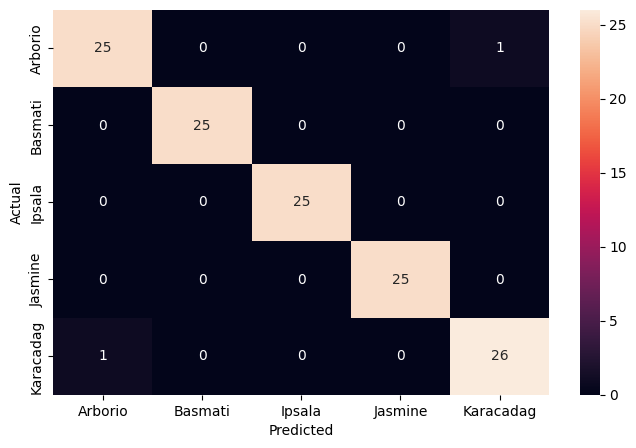

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'], yticklabels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**

- As observed from the confusion matrix, there are very few misclassification by the model.

- One instance of Basmati is wrongly classified as Jasmine. A Possible reason could be that both of these rice types have longer grains.

- Two instances of Karacadag are wrongly classified as Arborio. A Possible reason is, that both of them have rounded grains.

## **Conclusion**

- This problem was to to find the most efficient Deep Learning architecture that can classify these magnified images of rice grains into their classes.
- By efficiency, we are not only talking about accuracy. We are also talking about computation time because when this model will be implemented in the real world, we would expect it to be super fast, besides being super accurate.
- We visualized the five types of rice. From manual inspection, we can state that only an expert or someone who has a lot of knowledge in the field of agriculture, can correctly identify all these rice types. That's because there are a lot of similarities between two or more classes. There are subtle differences that might not even be evident to someone not so familiar with these rice types beforehand.
- The first architecture was a Fully Connected Neural Network. Although we don't expect ANNs or Fully Connected Neural Networks to perform well with image data, this model did quite well. The possible reason was that all the images had grain in their center. So, local spatiality was not an issue. But still, its test accuracy was lower in comparision to CNN models.
- The first CNN model perfomed extremely well. But it was a huge model and naturally, we see exceptionally high computation time. This may bring down it's efficiency while being used in real world.

- Therefore, we go for a smaller CNN model (less number of parameters). This model had a low computation time and had the best test accuracy among all the models. There are very few misclassification made by the model. Hence, we will pick 'model2' as the final model for rice type classification.